In [24]:
import numpy as np
from qiskit import *
from qiskit.visualization import plot_histogram

In [25]:
bit_string='101'
n=len(bit_string)
case='balanced'

In [26]:
def oracle_circuit(case,bit_string):
    if case == 'balanced':
        n=len(bit_string)
        oracle_circuit=QuantumCircuit(n+1)
    
        for qubit in range(n):
            if bit_string[qubit]=='1':
                oracle_circuit.x(qubit)
    
        for qubit in range(n):
            oracle_circuit.cx(qubit,n)
        
        for qubit in range(n):
            if bit_string[qubit]=='1':
                oracle_circuit.x(qubit)
    
    oracle_gate=oracle_circuit.to_gate()
    oracle_gate.name='U_f'
    return oracle_gate       

In [27]:
def dj_circuit(oracle,n):
    dj_circuit=QuantumCircuit(n+1,n)
    
    for qubit in range(n):
        dj_circuit.h(qubit)
    
    dj_circuit.x(n)
    dj_circuit.h(n)
    
    dj_circuit.append(oracle,range(n+1))
    
    for qubit in range(n):
        dj_circuit.h(qubit)
    
    for qubit in range(n):
        dj_circuit.measure(qubit,qubit)
        
    return dj_circuit   

In [28]:
oracle=oracle_circuit(case,bit_string)
q_circuit=dj_circuit(oracle,n)
q_circuit.draw()

┌───┐     ┌──────┐┌───┐┌─┐      
q_0: ┤ H ├─────┤0     ├┤ H ├┤M├──────
     ├───┤     │      │├───┤└╥┘┌─┐   
q_1: ┤ H ├─────┤1     ├┤ H ├─╫─┤M├───
     ├───┤     │  U_f │├───┤ ║ └╥┘┌─┐
q_2: ┤ H ├─────┤2     ├┤ H ├─╫──╫─┤M├
     ├───┤┌───┐│      │└───┘ ║  ║ └╥┘
q_3: ┤ X ├┤ H ├┤3     ├──────╫──╫──╫─
     └───┘└───┘└──────┘      ║  ║  ║ 
c: 3/════════════════════════╩══╩══╩═
                             0  1  2

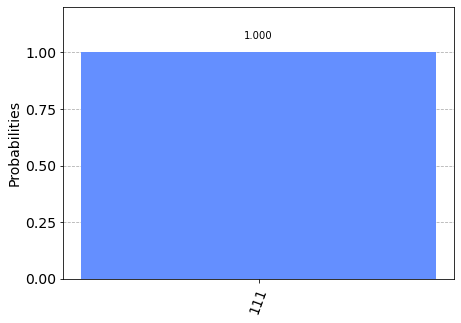

In [29]:
simulator=Aer.get_backend('qasm_simulator')
job_c=execute(q_circuit,backend=simulator)
counts=job_c.result().get_counts()
plot_histogram(counts)

In [30]:
IBMQ.load_account()
provider=IBMQ.get_provider('ibm-q')
qcomp=provider.get_backend('ibmq_lima')
job_q = execute(q_circuit, backend=qcomp)

ibmqfactory.load_account:WARNING:2021-03-01 11:40:17,926: Credentials are already in use. The existing account in the session will be replaced.


In [31]:
from qiskit.tools.monitor import job_monitor
job_monitor(job_q)

Job Status: job has successfully run


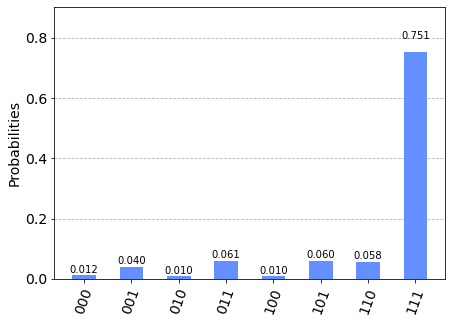

In [32]:
result_q=job_q.result()
plot_histogram(result_q.get_counts(q_circuit))